<a href="https://colab.research.google.com/github/khanhdang/Colab-ImageProcessing/blob/master/5_3__ORB_instead_of_SIFT_SURF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ORB
---
Ở đây, chúng ta sử dụng ORB thay vì SIFT vaf SURF

Lý do xem ở: [phía dưới](https://colab.research.google.com/drive/1Y2hvmbjtvdLusS-0FdLcCwNwqW2e5yB0#scrollTo=VICa894uTF3s&line=2&uniqifier=1)


In [0]:
#Tải dữ liệu
!rm *.jpg && rm *.zip*
!wget http://www.dangnamkhanh.com/share/5.3_SIFT_local.zip
!unzip 5.3_SIFT_local.zip && rm 5.3_SIFT_local.zip
!ls

rm: cannot remove '*.zip*': No such file or directory
--2019-03-07 15:27:56--  http://www.dangnamkhanh.com/share/5.3_SIFT_local.zip
Resolving www.dangnamkhanh.com (www.dangnamkhanh.com)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to www.dangnamkhanh.com (www.dangnamkhanh.com)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1083644 (1.0M) [application/zip]
Saving to: ‘5.3_SIFT_local.zip’

5.3_SIFT_local.zip  100%[===================>]   1.03M  --.-KB/s    in 0.09s   

2019-03-07 15:27:56 (11.4 MB/s) - ‘5.3_SIFT_local.zip’ saved [1083644/1083644]

Archive:  5.3_SIFT_local.zip
  inflating: item.jpg                
  inflating: item2.jpg               
  inflating: item3.jpg               
  inflating: item4.jpg               
  inflating: item5.jpg               
  inflating: scene.jpg               
  inflating: scene2.jpg              
  inflating: scene3.jpg              
haarcascade_eye.xml		     item3.jpg	item.jpg     

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files

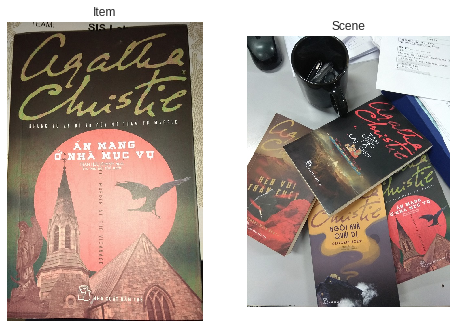

In [0]:
img1 = cv2.imread('item.jpg')   # queryImage
img2 = cv2.imread('scene2.jpg')  # trainImage

plt.subplot(1, 2, 1),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.grid(None),plt.xticks([]), plt.yticks([]), plt.title('Item')
plt.subplot(1, 2, 2),plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.grid(None),plt.xticks([]),plt.yticks([]), plt.title('Scene')

img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [0]:
orb = cv2.ORB_create(nfeatures=10000)

In [0]:
# find the keypoints and descriptors with orb
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [0]:
# using bruteforce matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [0]:
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

In [0]:
if len(matches) > 10:
    src_pts = np.float32(
        [kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32(
        [kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]
                     ).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    img2 = cv2.polylines(img2, [np.int32(dst)], True,
                         255, 3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" %
          (len(matches), MIN_MATCH_COUNT))
    matchesMask = None

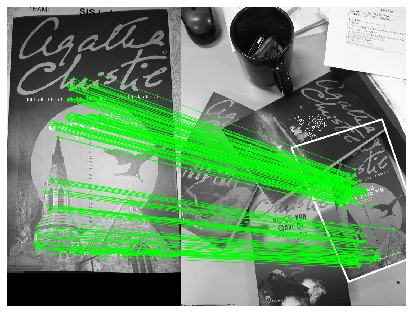

True

In [0]:
draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                   singlePointColor=None,
                   matchesMask=matchesMask,  # draw only inliers
                   flags=2)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, **draw_params)

plt.imshow(img3, 'gray'),plt.grid(None),plt.xticks([]), plt.yticks([]),  plt.show()
cv2.imwrite('matching.jpg',img3)

In [0]:
#files.download('matching.jpg')


SIFT/SURF trên OpenCV
---
Để chạy được SIFT trên opencv, chúng ta cần cài opencv-contrib (do bản quyền nên opencv ko có SIFT).
Với pip
```
pip install opencv-contrib-python
```
Với anaconda
```
conda install -c michael_wild opencv-contrib
```

đoạn mã dưới đây chưa chạy đc với google colab
Xem thư mục share 5.3_SIFT để lấy mã chạy trên máy

**Output**: *sift_keypoints.jpg*

![sift_keypoints](https://i.imgur.com/qHqg83B.jpg)

**Output**: matching

![sift_keypoints](https://i.imgur.com/NvJOsXq.jpg)
